## Problem Statement
From 2014–2018, sales data grew in volume and complexity, making it difficult for decision-makers to quickly understand performance drivers or spot emerging risks. Without a clear view of trends and anomalies, opportunities for growth, market expansion, and profitability optimization risk being overlooked.

## Objectives:
Build a clear, consolidated view of sales performance across products, channels, and regions.
Explore patterns and shifts in customer demand over time.
Detect unusual trends or anomalies that may signal risks or opportunities.
Compare actual results against budgets to evaluate target achievement.
Deliver actionable insights to guide pricing, promotions, and market entry strategies.

## ⛏️ Preparing the Environment

In [96]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
# Load data
sheets = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name = None)
print(sheets)

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
0       SO - 000225 2014-01-01                  126    Wholesale   
1      SO - 0003378 2014-01-01                   96  Distributor   
2      SO - 0005126 2014-01-01                    8    Wholesale   
3      SO - 0005614 2014-01-01                   42       Export   
4      SO - 0005781 2014-01-01                   73    Wholesale   
...             ...        ...                  ...          ...   
64099  SO - 0007573 2018-02-28                   74    Wholesale   
64100  SO - 0007706 2018-02-28                   51       Export   
64101  SO - 0007718 2018-02-28                  136  Distributor   
64102  SO - 0008084 2018-02-28                  158  Distributor   
64103  SO - 0008654 2018-02-28                   22  Distributor   

      Currency Code Warehouse Code  Delivery Region Index  \
0               USD         AXW291                    364   
1               USD         AXW291          

In [99]:
#Assigning dataframes to each sheet
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_products = sheets['Products']
df_budgets = sheets['2017 Budgets']

In [100]:
# Print first few rows for each sheet

print("\n— df_sales head —")
display(df_sales.head())
print()

print("\n— df_customers head —")
display(df_customers.head())
print()

print("\n— df_products head —")
display(df_products.head())
print()

print("\n— df_regions head —")
display(df_regions.head())
print()

print("\n— df_state_reg head —")
display(df_state_reg.head())
print()

print("\n— df_budgets head —")
display(df_budgets.head())


— df_sales head —


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270




— df_customers head —


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd




— df_products head —


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5




— df_regions head —


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago




— df_state_reg head —


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West




— df_budgets head —


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [101]:
## The first row of df_state_reg contains the real column names.
df_state_reg.columns = df_state_reg.iloc[0]      
df_state_reg = df_state_reg[1:].reset_index(drop = True)               
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [102]:
#Use .isnull().sum() → to count missing values.
print("\nMissing values in df_sales:")
print(df_sales.isnull().sum())

print("Missing values in df_customers:")
print(df_customers.isnull().sum())

print("\nMissing values in df_products:")
print(df_products.isnull().sum())

print("\nMissing values in df_regions:")
print(df_regions.isnull().sum())

print("\nMissing values in df_state_reg:")
print(df_state_reg.isnull().sum())

print("\nMissing values in df_budgets:")
print(df_budgets.isnull().sum())



Missing values in df_sales:
OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64
Missing values in df_customers:
Customer Index    0
Customer Names    0
dtype: int64

Missing values in df_products:
Index           0
Product Name    0
dtype: int64

Missing values in df_regions:
id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

Missing values in df_state_reg:
0
State Code    0
State         0
Region        0
dtype: i

## 🧹 Data Cleaning & Wrangling

In [104]:
# Merge with customers dataframe
df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
)
df.head()


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [105]:
# Merge with products dataframe
df = df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [106]:
# Merge with Regions dataframe
df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
)
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [107]:
# Merge with State Regions dataframe
df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how = 'left',
    left_on = 'state_code',
    right_on = 'State Code'
)
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [111]:
# Merge with 2017 budgets dataframe
df = df.merge(
    df_budgets,
    how = 'left',
    left_on = 'Product Name',
    right_on = 'Product Name'
)
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [119]:
# Clean up redundant columns
cols_to_drop = ['Customer Index' , 'Index', 'id', 'State Code']
df = df.drop(columns = cols_to_drop, errors = 'ignore')

In [121]:
# Convert all columns to lower case for consistency 
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [123]:
# 1) List only the columns you want to KEEP, now including the broader 'region'

cols_to_keep = [
        'ordernumber',
        'orderdate',
        'customer names',
        'channel',
        'product name',
        'order quantity',
        'unit price',
        'line total',
        'total unit cost',
        'state_code',
        'county',
        'state',
        'region',
        'latitude',
        'longitude',
        '2017 budgets',
]

# Subset the DataFrame to only these columns
df = df[cols_to_keep]
df.tail()

# 2) Rename to more Pythonic / self-explanatory names, including region
df = df.rename(columns = {
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name' : 'product_name',
    'order quantity': 'order_quantity',
    'unit price' : 'unit_price',
    'line total': 'revenue',
    'total unit cost': 'cost',
    'state_code': 'state',
    'state': 'state_name',
    'latitude' : 'lat',
    'longitude': 'lon',
    '2017 budgets': 'budget'
})
# Display the cleaned DataFrame structure
df.head()    

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [125]:
#Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

In [127]:
#Filter the dataset to only include records from year 2017
df_2017 = df[df['order_date'].dt.year == 2017]
df.head(1)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN


## Feature Engineering

In [130]:
#Revenue- Total income generated from sales: Order quantity * Unit price
#Total cost- Cost to produce goods the sold goods: Order quantity * Total unit cost
#Profit = Revenue - Total cost

df['total_cost'] = df['order_quantity'] * df['cost']
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] = df['profit'] / df['revenue']*100

## 📊 Exploratory Data Analysis


## 🪧 1. Monthly Sales Trend Over 

Goal: Track revenue trends over time to detect seasonality or sales spikes.


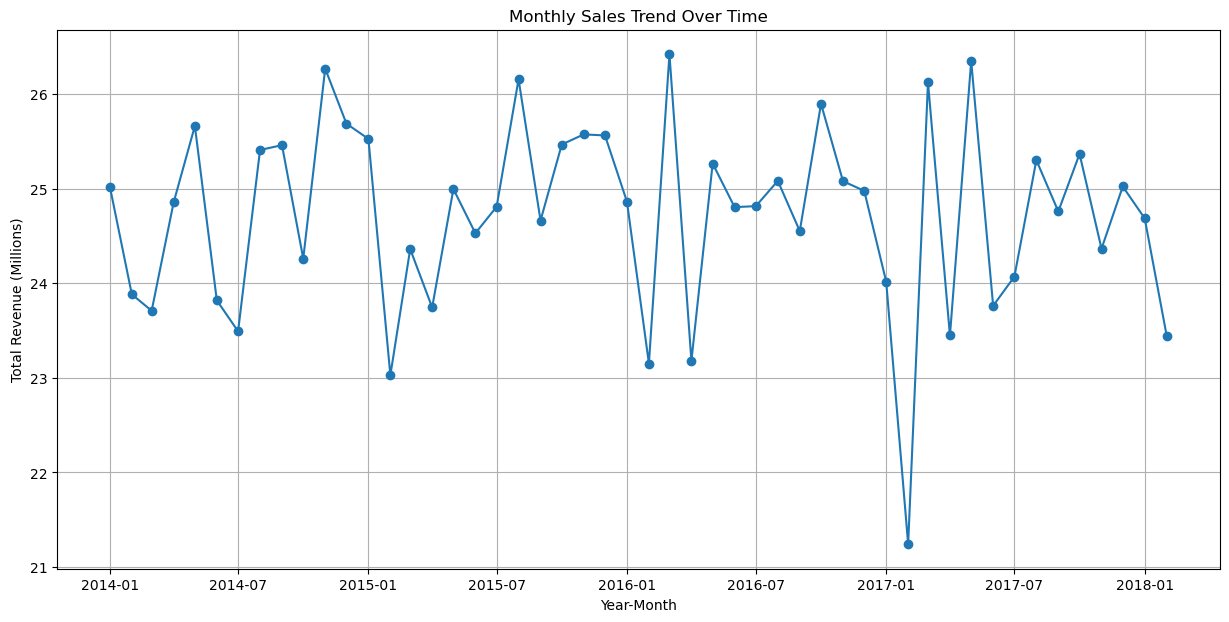

In [148]:
# Ensure order_date is in datetime format
df["order_date"] = pd.to_datetime(df["order_date"])

# Create a year-month column for grouping
df["year_month"] = df["order_date"].dt.to_period("M")

# Aggregate revenue by year-month
monthly_sales = df.groupby("year_month")["revenue"].sum().reset_index()

# Convert Period to Timestamp for plotting
monthly_sales["year_month"] = monthly_sales["year_month"].dt.to_timestamp()

# Plot bar chart
plt.figure(figsize=(15,7))
plt.plot(monthly_sales["year_month"], monthly_sales["revenue"] / 1e6, marker="o")
plt.title("Monthly Sales Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue (Millions)")
plt.grid(True)
plt.show()

## 💡 Insights

- Monthly revenue mostly stays within 23M–26M showing overall stability over the years.
- There are a few sharp dips, most notably around early 2017 (~ 21M) and early 2016 (~ 23M).
- There’s no clear upward or downward trend across years but each year shows a similar pattern with sharp rises and dips, highlighting strong seasonality period.

## 🪧 2. Monthly Sales Trend Over Time

Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month.

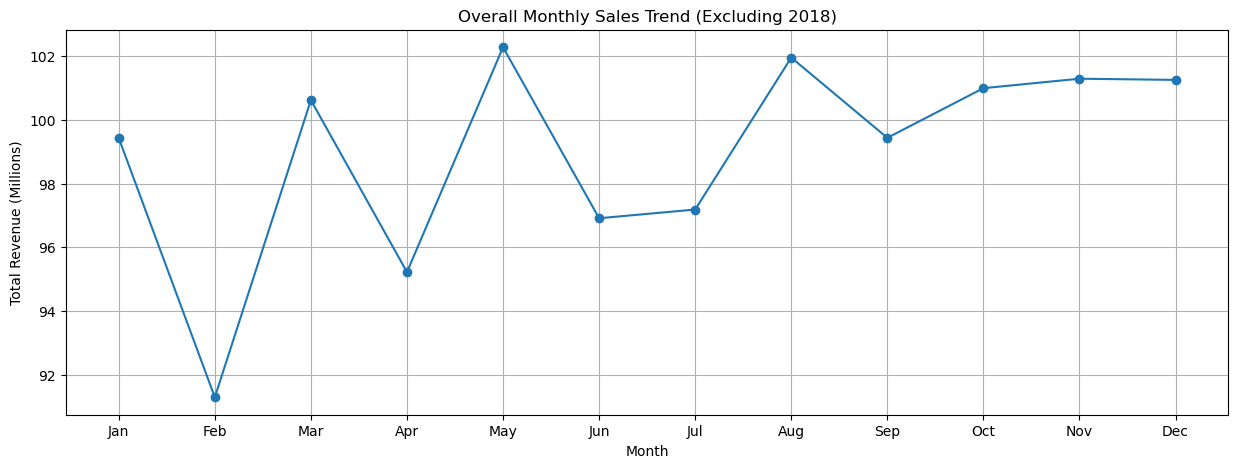

In [180]:
# Remove Jan & Feb 2018 records to avoid early-period anomalies
df_new = df[~((df['order_date'].dt.year == 2018) & 
              (df['order_date'].dt.month.isin([1, 2])))].copy()

# Extract month number (1–12) for seasonality analysis
df_new["month"] = df_new["order_date"].dt.month

# Aggregate revenue by month across all years
seasonality = df_new.groupby("month")["revenue"].sum().reset_index()

# Plot line chart showing seasonality pattern
plt.figure(figsize=(15,5))
plt.plot(seasonality["month"], seasonality["revenue"] / 1e6, marker="o") 
plt.title("Overall Monthly Sales Trend (Excluding 2018)")
plt.xlabel("Month")
plt.ylabel("Total Revenue (Millions)")
plt.xticks(range(1,13),
           ["Jan","Feb","Mar","Apr","May","Jun",
            "Jul","Aug","Sep","Oct","Nov","Dec"])
plt.grid(True)


##  💡 Insights

- Sales peaked in May (102M) and again in August (102M) showing strong seasonal recovery.
- Revenue dropped sharply in February (~ 91M) marking the weakest month of the year.
- From October to December, revenue remained steady around ~101M indicating consistent year-end sales.

## 🪧 3. Top 10 Products by Revenue (in Millions)

Goal: Identify the highest-grossing products to focus marketing and inventory efforts.


/var/folders/lh/btv12cz536j12bsyxrr8ftww0000gn/T/ipykernel_22918/4235043768.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='viridis')


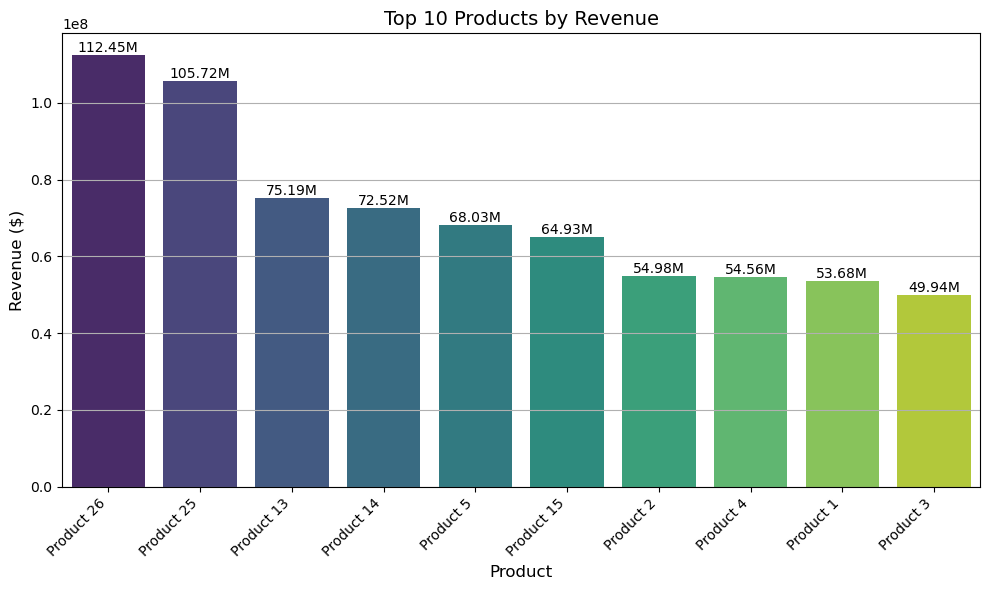

In [184]:
# Aggregate total revenue for each product
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Select top 10 revenue-generating products
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Plot bar chart 
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='viridis')

# Add revenue labels on top of each bar (in millions)
for container in ax.containers:
    ax.bar_label(container, labels=[f"{v.get_height()/1e6:.2f}M" for v in container])

# Formatting the chart
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## 💡 Insights

- Product 26 (112.45M ) and Product 25 (105.72M) generate the highest revenue among all products.
- There’s a steep drop after the top two products, as the third-highest (Product 13) generates $75M, nearly 30% less than the first two products.
- The bottom five products together bring in less than the top two alone, highlighting heavy reliance on a few key products.

## 🪧 4. Bottom 10 Products by Revenue (in Millions)

Goal: Identify the lowest-grossing products to focus marketing and inventory efforts.

/var/folders/lh/btv12cz536j12bsyxrr8ftww0000gn/T/ipykernel_22918/428660780.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='viridis')


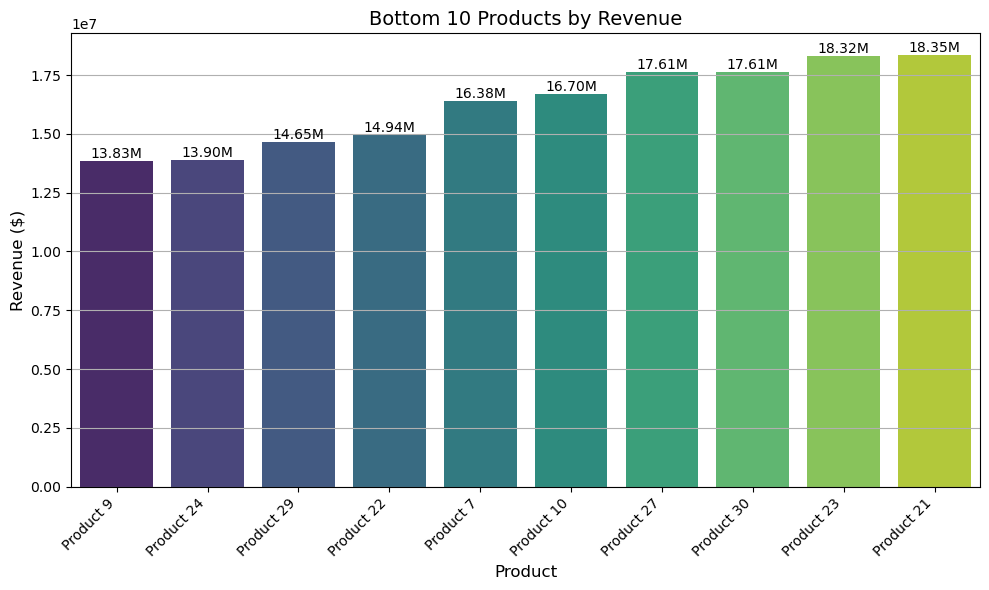

In [188]:
# Aggregate total revenue for each product
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Select bottom 10 revenue-generating products
top_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='viridis')

# Add revenue labels on top of each bar (in millions)
for container in ax.containers:
    ax.bar_label(container, labels=[f"{v.get_height()/1e6:.2f}M" for v in container])

# Formatting the chart
plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## 💡 Insights

- The lowest revenue comes from Product 9 (13.83M) and Product 24 (13.90M) making them the weakest performers.
- The revenue range among the bottom 10 is relatively narrow ( 13.8M – 18.4M) showing they all underperform at a similar level.   

## 🪧 5. Total Sales and Average Profit Margin % by Channel

Goal: Understand sales distribution across channels to identify dominant routes, and compare average profit margins to analyze profitability by channel.

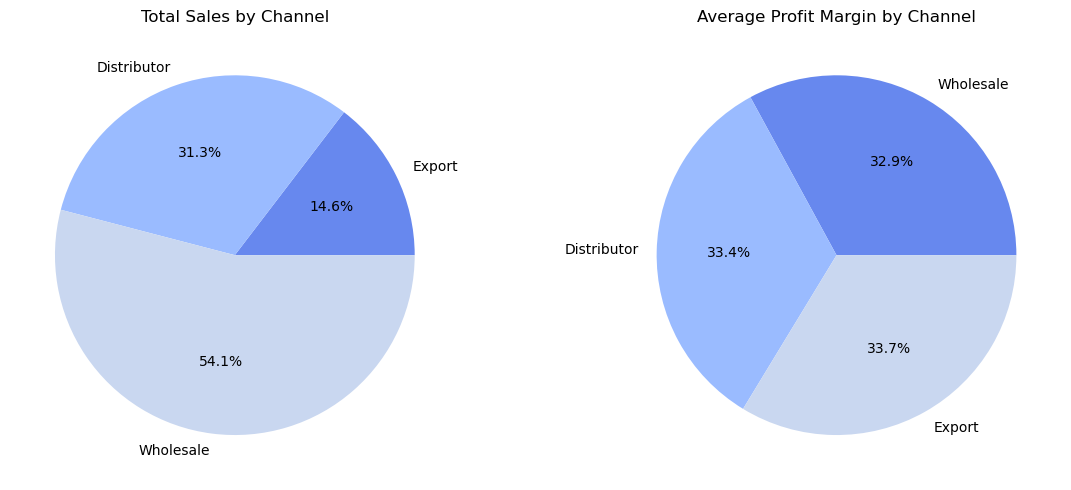

In [42]:
# Create a figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Chart 1: Total Sales by Channel 

# Aggregate total revenue by channel
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

# Plot pie chart 
ax1.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)
ax1.set_title('Total Sales by Channel')

# Chart 2: Profit Margin by Channel 

# Find average profit margin percentage for each channel
chan_margin = df.groupby('channel')['profit_margin_pct'].mean().sort_values(ascending=True)

# Plot pie chart 
ax2.pie(
    chan_margin.values,
    labels=chan_margin.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)
ax2.set_title('Average Profit Margin by Channel')

# Adjust layout and display both charts
plt.tight_layout()
plt.show()


## 💡 Insights

- Wholesale drives the majority of sales contributing 54.1% of total revenue while distributors contributes 31.3% and exports 14.6%.
- Despite wholesale dominating sales, profit margins are fairly balanced across channels: Export (33.7%), Distributor (33.4%), and Wholesale (32.9%).
- Exports contribute the smallest share of sales but deliver the highest profit margin, suggesting strong efficiency and potential for growth if expanded.

## 🪧 6. Top and Bottom 10 Customers by Revenue 

Goal: Identify highest and lowest revenue customers to identify key contributors and less active customers.

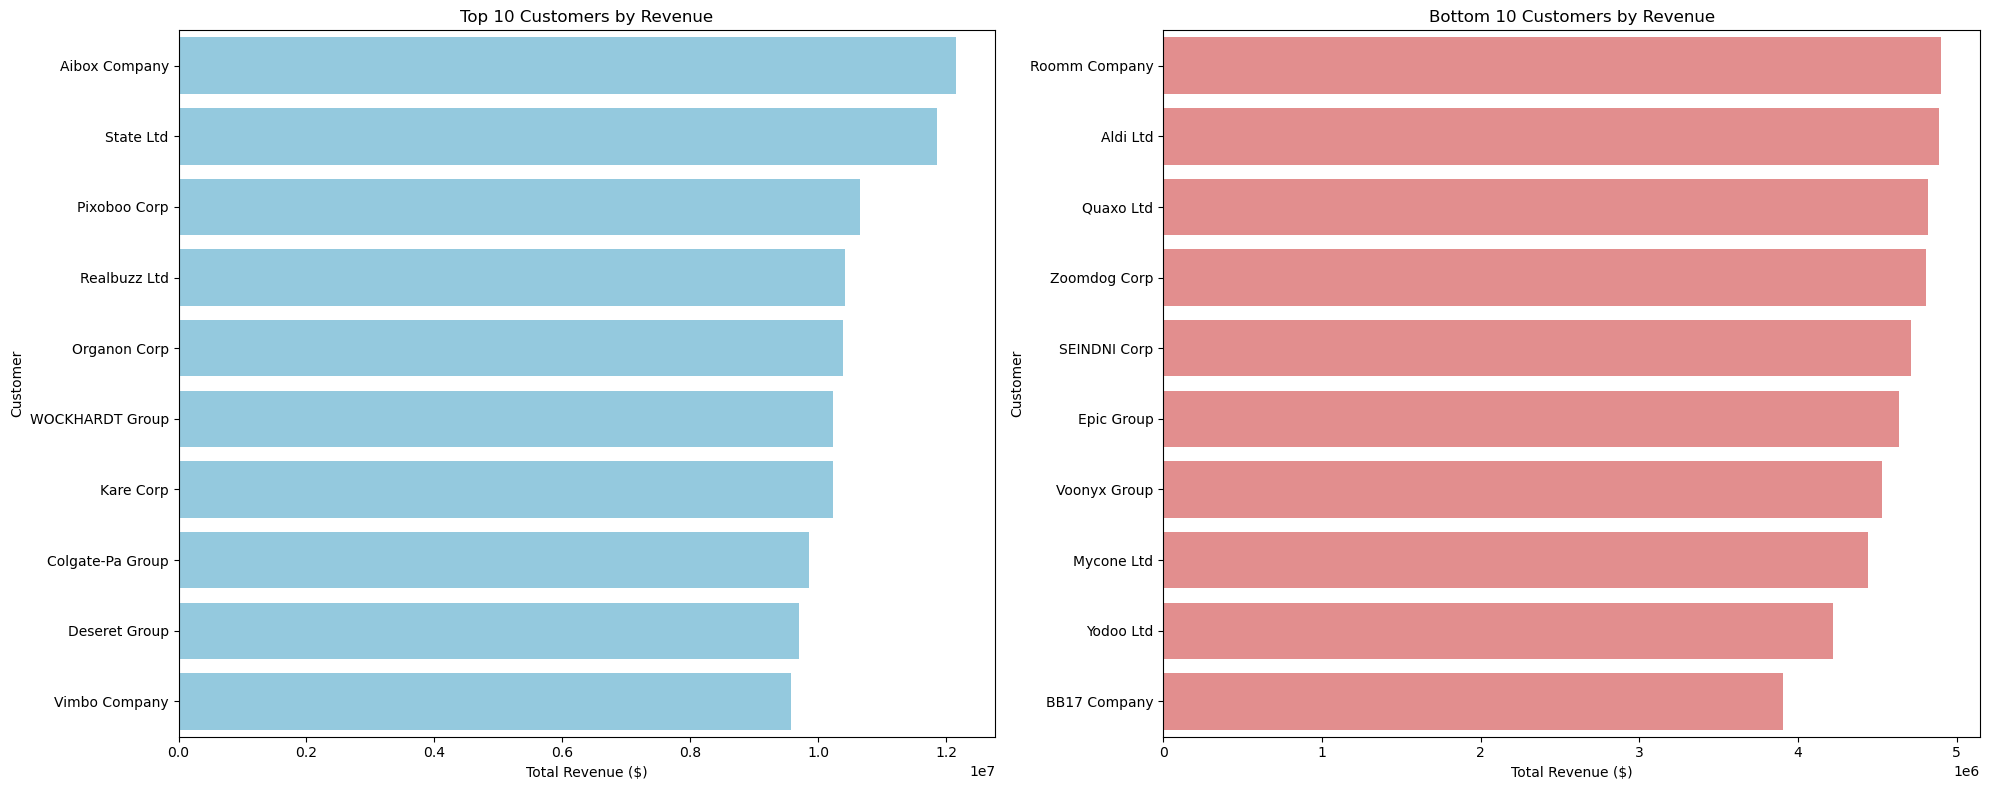

In [45]:

# Calculate total revenue per customer
customer_revenue = df_new.groupby("customer_name")["revenue"].sum().reset_index()

# Sort customers by revenue
customer_revenue = customer_revenue.sort_values(by="revenue", ascending=False)

# Select Top 10 and Bottom 10 customers
top_10 = customer_revenue.head(10)
bottom_10 = customer_revenue.tail(10)

# Plot side by side
plt.figure(figsize=(20,8))

# Top 10 customers
plt.subplot(1, 2, 1)
sns.barplot(x="revenue", y="customer_name", data=top_10, color="skyblue")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Customer")

# Bottom 10 customers
plt.subplot(1, 2, 2)
sns.barplot(x="revenue", y="customer_name", data=bottom_10, color="lightcoral")
plt.title("Bottom 10 Customers by Revenue")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Customer")

plt.tight_layout()
plt.show()


## 💡 Insights

- Top customers are nearly twice as valuable as bottom customers. Aibox Company and State Ltd each generate ~12M in revenue while the highest among the bottom customers (Roomm Company, Aldi Ltd) contribute just under 5M.
- Bottom-10 customers still contribute meaningful revenue, with even the smallest (BB17 Company) generating about 3.8M showing that no customer is negligible in terms of contribution.

## 🪧 7. Top 10 States by Revenue and Order Count

Goal: Highlight the top 10 states by revenue and order volume to understand which states contributes most to sales and demand.

/var/folders/lh/btv12cz536j12bsyxrr8ftww0000gn/T/ipykernel_22918/2597068958.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_revenue, x="state_name", y="revenue", palette="Set2")
/var/folders/lh/btv12cz536j12bsyxrr8ftww0000gn/T/ipykernel_22918/2597068958.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_orders, x="state_name", y="order_number", palette="Set2")


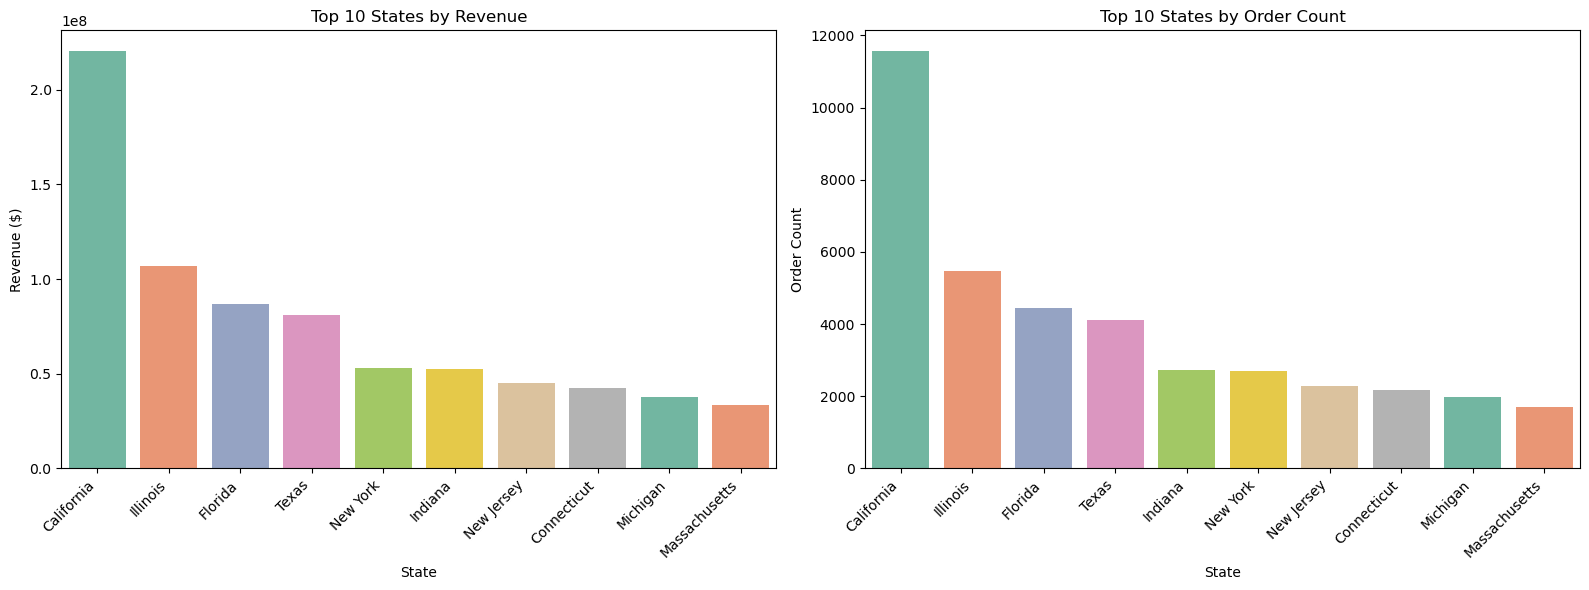

In [48]:

# Get top 10 states by revenue
state_revenue = df_new.groupby("state_name")["revenue"].sum().reset_index()
top10_revenue = state_revenue.sort_values(by="revenue", ascending=False).head(10)

# Get top 10 states by order count
state_orders = df_new.groupby("state_name")["order_number"].count().reset_index()
top10_orders = state_orders.sort_values(by="order_number", ascending=False).head(10)

# Plot side by side
plt.figure(figsize=(16,6))

# Left plot - Revenue
plt.subplot(1, 2, 1)
sns.barplot(data=top10_revenue, x="state_name", y="revenue", palette="Set2")
plt.title("Top 10 States by Revenue")
plt.xlabel("State")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45, ha="right")

# Right plot - Order Count
plt.subplot(1, 2, 2)
sns.barplot(data=top10_orders, x="state_name", y="order_number", palette="Set2")
plt.title("Top 10 States by Order Count")
plt.xlabel("State")
plt.ylabel("Order Count")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


## 💡 Insights

- California generates over 220M in revenue with around 11,600 orders making it by far the largest contributor. Its revenue is more than double that of Illinois, the second highest state (~ 107M, ~ 5,500 orders).
- New York and Indiana generates similar revenue(~ 52M) but Indiana has slightly more order count(~ 2800) than New York(~2700) which shows New York order value is higher compared to Indiana.

## 🪧 8. Total Sales and Average Profit Margin by Region

Goal: Compare total sales and average profit margin across regions to evaluate both revenue contribution and profitability.

/var/folders/lh/btv12cz536j12bsyxrr8ftww0000gn/T/ipykernel_22918/255450734.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(x=region_sales_m.values, y=region_sales_m.index, palette='Blues_r', ax=axes[0])
/var/folders/lh/btv12cz536j12bsyxrr8ftww0000gn/T/ipykernel_22918/255450734.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars2 = sns.barplot(x=region_margin.values, y=region_margin.index, palette='Greens_r', ax=axes[1])


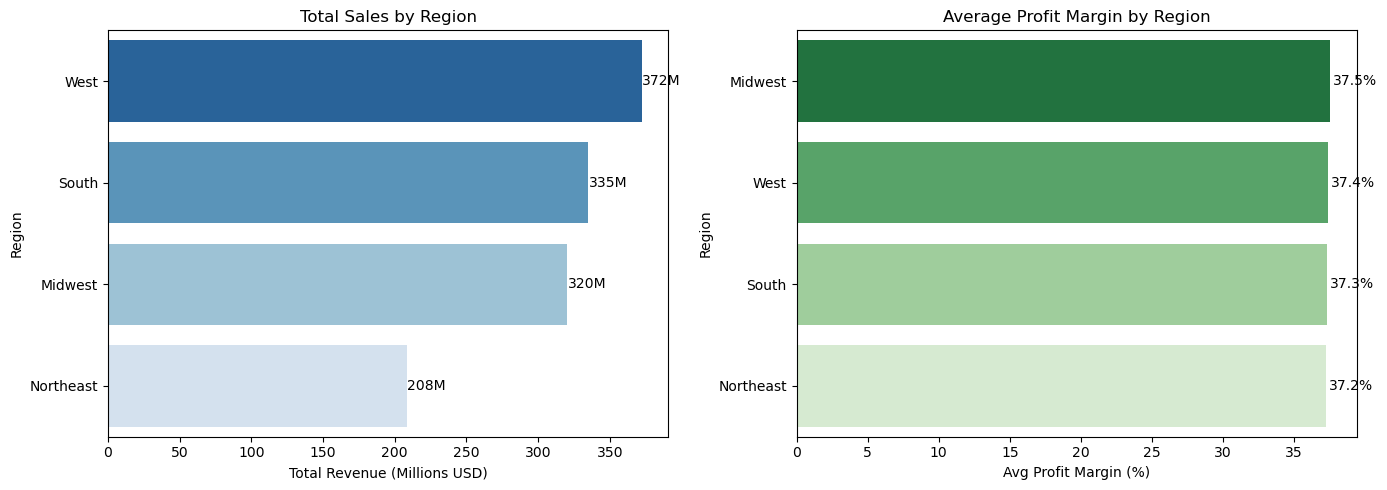

In [150]:
# Total sales/revenue by region
region_sales = df.groupby('region')['revenue'].sum().sort_values(ascending=False)
region_margin = df.groupby('region')['profit_margin_pct'].mean().sort_values(ascending=False)

# scale sales to millions
region_sales_m = region_sales / 1e6  

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Total sales by region
bars1 = sns.barplot(x=region_sales_m.values, y=region_sales_m.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Total Sales by Region')
axes[0].set_xlabel('Total Revenue (Millions USD)')
axes[0].set_ylabel('Region')

# Add values at the end of bars
for i, v in enumerate(region_sales_m.values):
    axes[0].text(v + 0.2, i, f'{v:.0f}M', va='center')

# Right plot: Avg profit margin by region
bars2 = sns.barplot(x=region_margin.values, y=region_margin.index, palette='Greens_r', ax=axes[1])
axes[1].set_title('Average Profit Margin by Region')
axes[1].set_xlabel('Avg Profit Margin (%)')
axes[1].set_ylabel('Region')

# Add values at the end of bars
for i, v in enumerate(region_margin.values):
    axes[1].text(v + 0.2, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()


## 💡 Insights

- The West leads in total sales with 372M, followed by the South at 335M and Midwest at 320M, while the Northeast lags far behind at $208M.
- Despite lower sales, the Midwest achieves the highest profit margin (37.5%), slightly above the West (37.4%).
- The Northeast not only has the lowest sales but also the lowest profit margin (37.2%), making it the weakest region overall.

## 🪧 9. Customer Segmentation: Revenue vs. Profit Margin

Goal: Segment customers by total revenue and average profit margin, highlighting order volume.

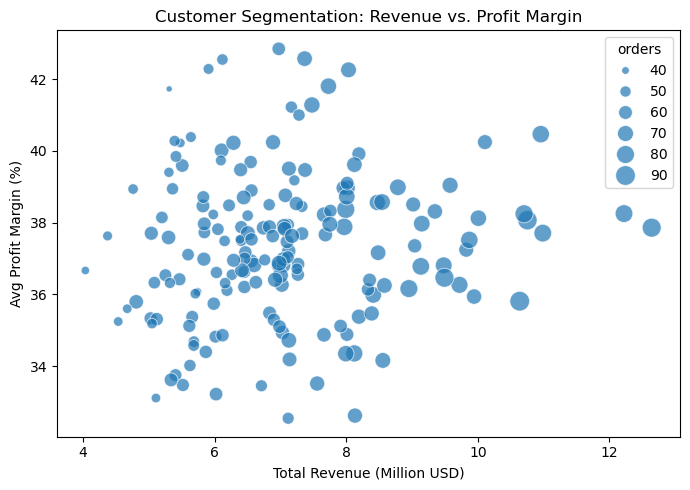

In [166]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()


## 💡 Insights

- Most customers generate between 5M and 9M in revenue, with profit margins clustering around 36–39%.
- A few customers stand out with higher revenues (above 10M), but their profit margins don’t necessarily increase, staying around the same 35–39% range.
- Some customers achieve higher profit margins (above 42%), but these are linked to lower revenues (under $8M), showing a trade-off between high margin and high volume.

## 🪧 10. Correlation Heatmap of Numeric Features

Goal: Identify correlations across numeric features to identify overlapping or strongly related variables.


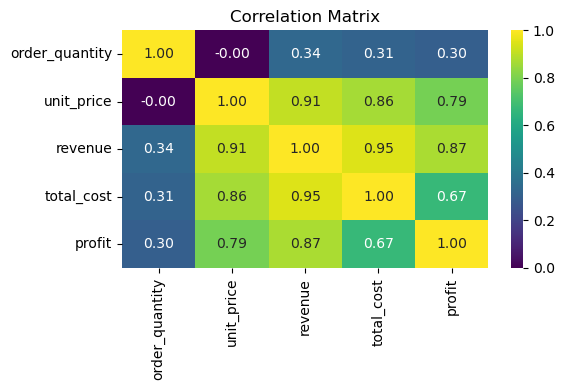

In [162]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

## 💡 Insights

- Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.
- Revenue is strongly correlated with both total cost (0.95) and unit price (0.91) meaning price changes have a major effect on sales value.
- Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.
- Order quantity shows weak correlation with revenue (0.34) and profit (0.30) and no correlation with unit price meaning selling more units does not always translate into higher sales and profit.


## 🗒️ Recommendations

- **Plan for seasonal changes:** Since sales consistently peak in May and August but dip sharply in February, plan promotions and marketing campaigns to boost sales in weaker months.
- **Sell a wider range of products:** Don’t rely too much on Products 25 and 26, promote mid-performing products and reevaluate underperforming products for improvement or phase-out.
- **Grow exports:** Although wholesale dominates sales volume, exports deliver the highest margins. Investing in export expansion could increase overall profitability.
- **Strengthen customer strategy:** Top customers contribute nearly twice as much as bottom customers but even smaller customers add meaningful revenue. Try to grow smaller, promising accounts with special programs.
- **Use regional strengths:** Expand where margins are high (Midwest), maintain top performance in California, and improve results in the weaker Northeast region.
- **Balance margin and volume trade-offs:** Customers with high revenues don’t always deliver higher margins and some smaller customers achieve higher margins. Tailor pricing and discount strategies to strike the right balance between profitability and sales volume.